In [1]:
import gc
import numpy as np # linear algebra
from collections import Counter # for counting commong words
import pandas as pd
import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text
from textblob import TextBlob
#import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')
# remove war
import warnings
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
%matplotlib inline

import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
foodon_reviews = pd.read_csv('foodonreviews.csv')
foodon_reviews.drop('Unnamed: 0',axis=1,inplace= True)
foodon_reviews

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,address,...,category8,category9,category10,date,review_id,stars_y,text,user_id,year,name_y
0,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2012-12-21,1K3I3fbsaSun9Al4ZLtAuw,5,love this place! its my new go to Thai restaur...,2dPAIXLPnRAdmjv5c-n1vw,2012,thai one on
1,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-10-31,4XeOuvBOkOkti2R5wmnyyg,1,Part of my order was missing. There were hard ...,HkKKAw2PAWVxuuooFkNFVQ,2013,thai one on
2,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2014-03-01,4AYMyDvSbjjkIgnZqnfMYQ,1,Really slow delivery and almost no chicken in ...,0WRUJ_yi5mqM9Qz8nOYxeQ,2014,thai one on
3,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-09-14,BrZ_MMwFsmt5DyLBoIHnQw,1,Visited this site 3 times with Groupon. \nSi...,QnR9A0VHuT4rtSdgaLmIBQ,2013,thai one on
4,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-12-22,wZJK7LQ3KKPlg4wA9WXM3w,3,"This place is sub-par, but my bf swears by the...",LiNx18WUre9WFCEQlUhtKA,2013,thai one on
5,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-05-20,QTs4UfT3sLMkT9OVNds2ag,1,Last visit. Ever.\nAnother groupon and one mor...,6iZ4KZDyIimYFUN3rbRZEg,2013,thai one on
6,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2012-08-17,QzFzdW5otW72rkN7I1zMng,2,I had the Pad Thai with chicken and shrimp it ...,5JfchbYrvSLUL5_HTohjOQ,2012,thai one on
7,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,NaN,NaN,2015-07-12,zIs4h9IDEwwPNjAbX0q3jw,5,Such a cute bakery with welcoming and friendly...,7eX01e821qiLbvoQQpNmIw,2015,mabel's bakery
8,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,NaN,NaN,2015-09-24,jukJjtrCkYlmeTVtleAEiA,1,I was a huge fan of Mabels until I bought a ca...,OXDIm9gqgtedByYC_D7Vig,2015,mabel's bakery
9,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,NaN,NaN,2016-02-08,V0WqiEsdi53fAHGF33u6Sg,3,My wife and I go to Mabel's every Saturday mor...,B0eKmqtOI7_HQu0DYK-Dzg,2016,mabel's bakery


In [18]:
#Lemmatization
from textblob import Word
foodon_reviews['text']=foodon_reviews['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
foodon_reviews['text'].head()

0    love this place! it my new go to Thai restaura...
1    Part of my order wa missing. There were hard i...
2    Really slow delivery and almost no chicken in ...
3    Visited this site 3 time with Groupon. Site ha...
4    This place is sub-par, but my bf swears by the...
Name: text, dtype: object

In [19]:
foodon_reviews.to_csv('foodon_lem.csv')

In [20]:
foodon_reviews_1=pd.read_csv("foodon_lem.csv")
foodon_reviews_1.drop('Unnamed: 0',axis=1,inplace= True)
foodon_reviews_1

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,address,...,category8,category9,category10,date,review_id,stars_y,text,user_id,year,name_y
0,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2012-12-21,1K3I3fbsaSun9Al4ZLtAuw,5,love this place! it my new go to Thai restaura...,2dPAIXLPnRAdmjv5c-n1vw,2012,thai one on
1,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-10-31,4XeOuvBOkOkti2R5wmnyyg,1,Part of my order wa missing. There were hard i...,HkKKAw2PAWVxuuooFkNFVQ,2013,thai one on
2,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2014-03-01,4AYMyDvSbjjkIgnZqnfMYQ,1,Really slow delivery and almost no chicken in ...,0WRUJ_yi5mqM9Qz8nOYxeQ,2014,thai one on
3,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-09-14,BrZ_MMwFsmt5DyLBoIHnQw,1,Visited this site 3 time with Groupon. Site ha...,QnR9A0VHuT4rtSdgaLmIBQ,2013,thai one on
4,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-12-22,wZJK7LQ3KKPlg4wA9WXM3w,3,"This place is sub-par, but my bf swears by the...",LiNx18WUre9WFCEQlUhtKA,2013,thai one on
5,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-05-20,QTs4UfT3sLMkT9OVNds2ag,1,Last visit. Ever. Another groupon and one more...,6iZ4KZDyIimYFUN3rbRZEg,2013,thai one on
6,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2012-08-17,QzFzdW5otW72rkN7I1zMng,2,I had the Pad Thai with chicken and shrimp it ...,5JfchbYrvSLUL5_HTohjOQ,2012,thai one on
7,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,NaN,NaN,2015-07-12,zIs4h9IDEwwPNjAbX0q3jw,5,Such a cute bakery with welcoming and friendly...,7eX01e821qiLbvoQQpNmIw,2015,mabel's bakery
8,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,NaN,NaN,2015-09-24,jukJjtrCkYlmeTVtleAEiA,1,I wa a huge fan of Mabels until I bought a cak...,OXDIm9gqgtedByYC_D7Vig,2015,mabel's bakery
9,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,NaN,NaN,2016-02-08,V0WqiEsdi53fAHGF33u6Sg,3,My wife and I go to Mabel's every Saturday mor...,B0eKmqtOI7_HQu0DYK-Dzg,2016,mabel's bakery


In [21]:
foodon_reviews_1['name'] = foodon_reviews_1['name_x']
foodon_reviews_1.drop('name_x',axis=1, inplace=True)
foodon_reviews_1.drop('name_y',axis=1, inplace=True)
foodon_reviews_1

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,address,...,category8,category9,category10,date,review_id,stars_y,text,user_id,year,name
0,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2012-12-21,1K3I3fbsaSun9Al4ZLtAuw,5,love this place! it my new go to Thai restaura...,2dPAIXLPnRAdmjv5c-n1vw,2012,thai one on
1,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-10-31,4XeOuvBOkOkti2R5wmnyyg,1,Part of my order wa missing. There were hard i...,HkKKAw2PAWVxuuooFkNFVQ,2013,thai one on
2,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2014-03-01,4AYMyDvSbjjkIgnZqnfMYQ,1,Really slow delivery and almost no chicken in ...,0WRUJ_yi5mqM9Qz8nOYxeQ,2014,thai one on
3,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-09-14,BrZ_MMwFsmt5DyLBoIHnQw,1,Visited this site 3 time with Groupon. Site ha...,QnR9A0VHuT4rtSdgaLmIBQ,2013,thai one on
4,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-12-22,wZJK7LQ3KKPlg4wA9WXM3w,3,"This place is sub-par, but my bf swears by the...",LiNx18WUre9WFCEQlUhtKA,2013,thai one on
5,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-05-20,QTs4UfT3sLMkT9OVNds2ag,1,Last visit. Ever. Another groupon and one more...,6iZ4KZDyIimYFUN3rbRZEg,2013,thai one on
6,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2012-08-17,QzFzdW5otW72rkN7I1zMng,2,I had the Pad Thai with chicken and shrimp it ...,5JfchbYrvSLUL5_HTohjOQ,2012,thai one on
7,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,NaN,NaN,2015-07-12,zIs4h9IDEwwPNjAbX0q3jw,5,Such a cute bakery with welcoming and friendly...,7eX01e821qiLbvoQQpNmIw,2015,mabel's bakery
8,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,NaN,NaN,2015-09-24,jukJjtrCkYlmeTVtleAEiA,1,I wa a huge fan of Mabels until I bought a cak...,OXDIm9gqgtedByYC_D7Vig,2015,mabel's bakery
9,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,NaN,NaN,2016-02-08,V0WqiEsdi53fAHGF33u6Sg,3,My wife and I go to Mabel's every Saturday mor...,B0eKmqtOI7_HQu0DYK-Dzg,2016,mabel's bakery


In [22]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again

'''
    Takes in a string of text, then performs the following:
    1. Performs case normalization
    2. Remove all punctuation
    3. Remove all stopwords
    4. Return the cleaned text as a list of words
    '''

# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
foodon_reviews_1['text_clear'] = foodon_reviews_1['text'].apply(preprocess)


def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity


foodon_reviews_1['senti_polarity'] = foodon_reviews_1['text_clear'].apply(sentiment)
foodon_reviews_1

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,address,...,category10,date,review_id,stars_y,text,user_id,year,name,text_clear,senti_polarity
0,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,2012-12-21,1K3I3fbsaSun9Al4ZLtAuw,5,love this place! it my new go to Thai restaura...,2dPAIXLPnRAdmjv5c-n1vw,2012,thai one on,love place new go thai restaurant food always ...,0.314378
1,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,2013-10-31,4XeOuvBOkOkti2R5wmnyyg,1,Part of my order wa missing. There were hard i...,HkKKAw2PAWVxuuooFkNFVQ,2013,thai one on,part order wa missing hard inedible bit dishes...,0.045437
2,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,2014-03-01,4AYMyDvSbjjkIgnZqnfMYQ,1,Really slow delivery and almost no chicken in ...,0WRUJ_yi5mqM9Qz8nOYxeQ,2014,thai one on,really slow delivery almost chicken three dish...,-0.013333
3,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,2013-09-14,BrZ_MMwFsmt5DyLBoIHnQw,1,Visited this site 3 time with Groupon. Site ha...,QnR9A0VHuT4rtSdgaLmIBQ,2013,thai one on,visited site time groupon site poor customer s...,-0.400000
4,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,2013-12-22,wZJK7LQ3KKPlg4wA9WXM3w,3,"This place is sub-par, but my bf swears by the...",LiNx18WUre9WFCEQlUhtKA,2013,thai one on,place subpar bf swears chicken devil thats got...,-0.071552
5,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,2013-05-20,QTs4UfT3sLMkT9OVNds2ag,1,Last visit. Ever. Another groupon and one more...,6iZ4KZDyIimYFUN3rbRZEg,2013,thai one on,last visit ever another groupon one chance met...,-0.048661
6,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,2012-08-17,QzFzdW5otW72rkN7I1zMng,2,I had the Pad Thai with chicken and shrimp it ...,5JfchbYrvSLUL5_HTohjOQ,2012,thai one on,pad thai chicken shrimp wa big portion chicken...,0.013898
7,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,2015-07-12,zIs4h9IDEwwPNjAbX0q3jw,5,Such a cute bakery with welcoming and friendly...,7eX01e821qiLbvoQQpNmIw,2015,mabel's bakery,cute bakery welcoming friendly staff came reco...,0.369444
8,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,2015-09-24,jukJjtrCkYlmeTVtleAEiA,1,I wa a huge fan of Mabels until I bought a cak...,OXDIm9gqgtedByYC_D7Vig,2015,mabel's bakery,wa huge fan mabels bought cake new location we...,0.277462
9,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,2016-02-08,V0WqiEsdi53fAHGF33u6Sg,3,My wife and I go to Mabel's every Saturday mor...,B0eKmqtOI7_HQu0DYK-Dzg,2016,mabel's bakery,wife go mabels every saturday morning love gre...,0.441667


In [32]:
foodon_reviews_1.to_csv('foodon_processed.csv')

### Taking preprocessed file from Business and Review dataset

In [23]:
foodon_reviews_2=pd.read_csv("foodon_processed.csv")
foodon_reviews_2.drop('Unnamed: 0',axis=1,inplace= True)
foodon_reviews_2

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,address,...,category10,date,review_id,stars_y,text,user_id,year,name,text_clear,senti_polarity
0,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,2012-12-21,1K3I3fbsaSun9Al4ZLtAuw,5,love this place! it my new go to Thai restaura...,2dPAIXLPnRAdmjv5c-n1vw,2012,thai one on,love place new go thai restaurant food always ...,0.314378
1,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,2013-10-31,4XeOuvBOkOkti2R5wmnyyg,1,Part of my order wa missing. There were hard i...,HkKKAw2PAWVxuuooFkNFVQ,2013,thai one on,part order wa missing hard inedible bit dishes...,0.045437
2,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,2014-03-01,4AYMyDvSbjjkIgnZqnfMYQ,1,Really slow delivery and almost no chicken in ...,0WRUJ_yi5mqM9Qz8nOYxeQ,2014,thai one on,really slow delivery almost chicken three dish...,-0.013333
3,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,2013-09-14,BrZ_MMwFsmt5DyLBoIHnQw,1,Visited this site 3 time with Groupon. Site ha...,QnR9A0VHuT4rtSdgaLmIBQ,2013,thai one on,visited site time groupon site poor customer s...,-0.400000
4,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,2013-12-22,wZJK7LQ3KKPlg4wA9WXM3w,3,"This place is sub-par, but my bf swears by the...",LiNx18WUre9WFCEQlUhtKA,2013,thai one on,place subpar bf swears chicken devil thats got...,-0.071552
5,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,2013-05-20,QTs4UfT3sLMkT9OVNds2ag,1,Last visit. Ever. Another groupon and one more...,6iZ4KZDyIimYFUN3rbRZEg,2013,thai one on,last visit ever another groupon one chance met...,-0.048661
6,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,2012-08-17,QzFzdW5otW72rkN7I1zMng,2,I had the Pad Thai with chicken and shrimp it ...,5JfchbYrvSLUL5_HTohjOQ,2012,thai one on,pad thai chicken shrimp wa big portion chicken...,0.013898
7,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,2015-07-12,zIs4h9IDEwwPNjAbX0q3jw,5,Such a cute bakery with welcoming and friendly...,7eX01e821qiLbvoQQpNmIw,2015,mabel's bakery,cute bakery welcoming friendly staff came reco...,0.369444
8,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,2015-09-24,jukJjtrCkYlmeTVtleAEiA,1,I wa a huge fan of Mabels until I bought a cak...,OXDIm9gqgtedByYC_D7Vig,2015,mabel's bakery,wa huge fan mabels bought cake new location we...,0.277462
9,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,2016-02-08,V0WqiEsdi53fAHGF33u6Sg,3,My wife and I go to Mabel's every Saturday mor...,B0eKmqtOI7_HQu0DYK-Dzg,2016,mabel's bakery,wife go mabels every saturday morning love gre...,0.441667


### We can observe that one business_id has multiple reviews which makes 482384 no of tuples,while the no of unique business_ids are 13225 hence taking the sentipolarity and grouping them by business_id we get 13225 tuples

In [24]:
spm = foodon_reviews_2.groupby(foodon_reviews_2.business_id)['senti_polarity'].mean().sort_values(ascending=True)

In [25]:
spm.to_csv('sentimean.csv')

In [26]:
header=["business_id","spm"]
spm1 = pd.read_csv("sentimean.csv", names = header)

In [27]:
spm1

,business_id,spm
0,FduOLezzT4jWWArKcJ3K0w,-0.480952
1,jOm2M6hn8M3BvrYwP7gV_g,-0.363889
2,8g8M-xvViH98Sooxi-X1uw,-0.342889
3,IyrwvRwiwsKCiiKoxbHeFA,-0.342692
4,F2ms2jtu6rmgtCNytJ0rkg,-0.330357
5,qTH9kobJY-wLiOUErSFw1g,-0.327778
6,94mjXtZg6pLGDu9oMrjg7A,-0.324583
7,19VNsxhnPZ11zc0KBauonQ,-0.323810
8,s3h1ha3-uC21YfffQvjhNQ,-0.323243
9,k_GZE3AvfeBXp4jqUIe5vw,-0.322663


In [28]:
foodon = pd.read_csv("foodon.csv")
foodon.drop('Unnamed: 0',axis=1,inplace= True)

foodon_merged = pd.merge(foodon, spm1, how='inner', on='business_id')
foodon_merged

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,address,...,category2,category3,category4,category5,category6,category7,category8,category9,category10,spm
0,True,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.022833
1,True,2.0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,bakeries,coffee & tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339953
2,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,788 wilson avenue,...,food,latin american,restaurants,sandwiches,NaN,NaN,NaN,NaN,NaN,0.300128
3,False,1.0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,11:30-22:0,12:0-21:30,81 underhill drive,...,food,bakeries,restaurants,NaN,NaN,NaN,NaN,NaN,NaN,0.137492
4,True,2.0,11:30-21:0,11:30-21:0,11:30-21:0,11:30-22:0,11:30-23:0,11:30-23:0,11:30-22:0,"5451 highway, unit 7",...,food,italian,ice cream & frozen yogurt,NaN,NaN,NaN,NaN,NaN,NaN,0.130838
5,True,1.0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-0:0,11:0-0:0,11:0-23:0,126 clark avenue e,...,pizza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.319166
6,True,2.0,7:30-18:0,7:30-18:0,7:30-18:0,7:30-18:0,7:30-18:0,9:0-16:0,9:0-16:0,3469 lake shore boulevard w,...,bakeries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403798
7,NaN,2.0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:30-22:30,17:30-22:30,17:30-22:30,1701 bayview avenue,...,wine bars,indian,restaurants,bars,NaN,NaN,NaN,NaN,NaN,0.236624
8,True,2.0,10:30-23:0,10:30-23:0,10:30-23:0,10:30-23:0,10:30-23:0,10:30-23:0,10:30-22:0,49 eglinton ave east,...,burgers,fast food,restaurants,NaN,NaN,NaN,NaN,NaN,NaN,-0.173606
9,NaN,2.0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-0:0,636 dixon road,...,chicken wings,sandwiches,pizza,restaurants,NaN,NaN,NaN,NaN,NaN,0.185419


In [33]:
foodon_merged.to_csv("foodon_merged1.csv")

## Here we get the total no of tuples after calculating the sentipolarity to be 13225.

<a id="graph"></a>
#  Plotting the graphs of stars vs sentipolarity 
> Plotting the graph of stars vs sentipolarity to check the distribution of stars based on sentipolarity values.


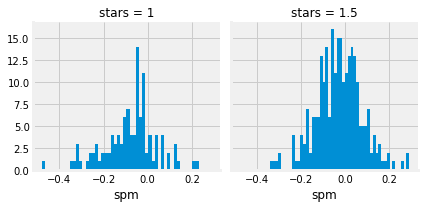

In [29]:
g = sns.FacetGrid(data=foodon_merged, col='stars',col_order=[1,1.5])
g.map(plt.hist, 'spm', bins=50)

#Histograms of text length distributions for each star rating. 
#Notice that there is a high number of 4-star and 5-star reviews.

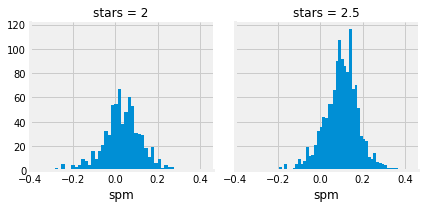

In [30]:
g = sns.FacetGrid(data=foodon_merged, col='stars',col_order=[2,2.5])
g.map(plt.hist, 'spm', bins=50)

#Histograms of text length distributions for each star rating. 
#Notice that there is a high number of 4-star and 5-star reviews.

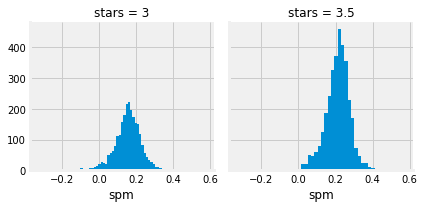

In [31]:
g = sns.FacetGrid(data=foodon_merged, col='stars',col_order=[3,3.5])
g.map(plt.hist, 'spm', bins=50)

#Histograms of text length distributions for each star rating. 
#Notice that there is a high number of 4-star and 5-star reviews.

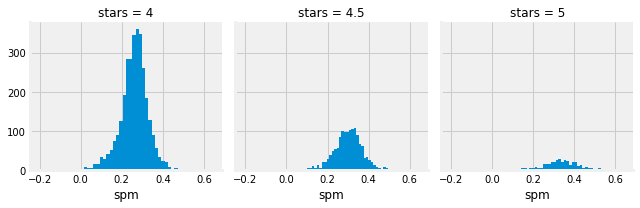

In [16]:
g = sns.FacetGrid(data=foodon_merged, col='stars',col_order=[4,4.5,5])
g.map(plt.hist, 'spm', bins=50)

#Histograms of text length distributions for each star rating. 
#Notice that there is a high number of 4-star and 5-star reviews.

### conclusion from above graph:
#### stars more than 3.5 are all distributed between the range  0 and 0.5 of sentipolarity  values.

In [ ]:
------------------------------------------------------------------------------------------------------------------------------